In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
df=pd.read_csv("/Users/irenewalken/Documents/GitHub/IH_RH_DA_FT_AUG_2022/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [24]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,1,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,1,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,0,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,1,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,0,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,0,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,1,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,0,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,1,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


# Activities List


**Tasks**

Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

* check if there are highly correlated features and drop them if there are any.
* One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
* for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [8]:
df=pd.read_csv("/Users/irenewalken/Documents/GitHub/IH_RH_DA_FT_AUG_2022/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [9]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
numerical = df.select_dtypes(include=np.number, exclude=np.object) #get numerical data

/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_2457/2735905696.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical = df.select_dtypes(include=np.number, exclude=np.object) #get numerical data


In [5]:
categoricals = df.select_dtypes(include=np.object, exclude=np.number) #get categorical data

/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_2457/557438992.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(include=np.object, exclude=np.number) #get categorical data


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

## check if there are highly correlated features and drop them if there are any.

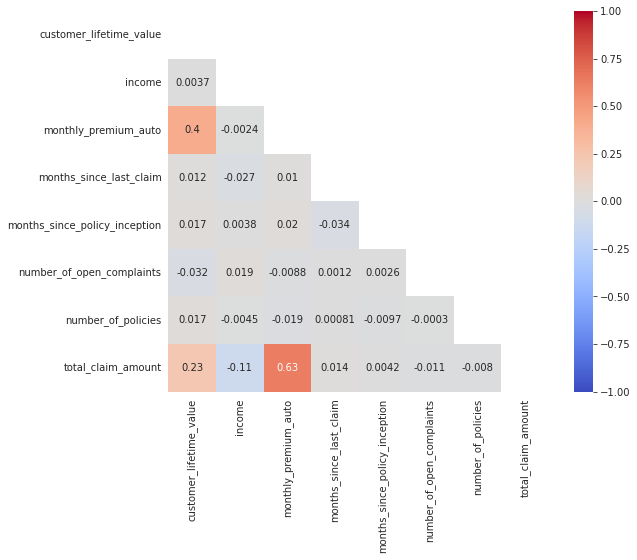

In [10]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [13]:
#check if there are highly correlated features. Result - no, we don't have (0.63 is the biggest value)
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

## One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [19]:
df['education'].unique()


array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  # label Encoding

In [22]:
df['education']= label_encoder.fit_transform(df['education'])
df['education'].unique()

array([1, 0, 3, 2, 4])

In [35]:
df['coverage'].unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [36]:
df['coverage']= label_encoder.fit_transform(df['coverage'])
df['coverage'].unique()

array([0, 1, 2])

In [23]:
categoricals_features=pd.get_dummies(categoricals, drop_first=True) # One hot
categoricals_features

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


## for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

### X-y split (y is the target variable, which is the total_claim_amount)

In [33]:
X=numerical.drop('total_claim_amount', axis=1)
y=numerical.total_claim_amount

In [34]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


### Data Splitting

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### Standardize

In [27]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [28]:
X_train.shape

(7482, 7)

In [29]:
X_test_scaled=std_scaler.transform(X_test)

In [30]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]
